<a href="https://colab.research.google.com/github/hyungchanchoi/AlgorithmTrading_pykiwoom/blob/main/kodex200_kodex_inv_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import os, sys
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import minmax_scale
from statsmodels.tsa.stattools import coint
today = datetime.today().strftime("%Y%m%d") 
# start = (datetime.today() - timedelta()).strftime("%Y%m%d") 
# print(start, today)
pd.options.display.float_format = '{:.6f}'.format

In [5]:
cd drive/My Drive/algorithmtrading/pair_trading

/content/drive/My Drive/algorithmtrading/pair_trading


In [3]:
def one_day(temp,test_day):
    
    begin = np.where( np.array(temp.index) > str(test_day))[0][0]
    end = np.where( str(test_day+1) > np.array(temp.index) )[0][-1]
    
    if len(temp.iloc[begin:end])==0:
        print(test_day,'는 공휴일 입니다.')
    else:
        return temp.iloc[begin:end]

# - 과거 1분단위 데이터 받아오기

In [14]:
now = '20210112'

kodex200 = pd.read_pickle('KODEX 200(T)_'+now)
kodex_inv = pd.read_pickle('KODEX 인버스(T)_'+now)

temp =  pd.merge(left = kodex200 , right = kodex_inv, how = "inner", on = "체결시간")
temp = temp.set_index('체결시간')
temp.columns = ['kodex200','volume','kodex_inv','volume']
temp = temp[['kodex200','kodex_inv']]

temp['kodex200']=pd.to_numeric(temp['kodex200'])
temp['kodex_inv']=pd.to_numeric(temp['kodex_inv'])

temp['kodex200']=abs(temp['kodex200'])
temp['kodex_inv']=abs(temp['kodex_inv'])

temp['kodex_inv'] = temp['kodex_inv']*11
temp['spread'] = temp['kodex200'] + temp['kodex_inv']
temp['ma60_spread'] = temp['spread'].rolling(window=10, center=False).mean()

temp

kodex200  kodex_inv  spread  ma60_spread
체결시간                                                    
20201224090018     37220      49885   87105          nan
20201224090018     37220      49885   87105          nan
20201224090018     37220      49885   87105          nan
20201224090018     37220      49940   87160          nan
20201224090018     37220      49940   87160          nan
...                  ...        ...     ...          ...
20210112151957     43230      42680   85910 85893.500000
20210112151957     43230      42680   85910 85894.000000
20210112151957     43235      42680   85915 85895.000000
20210112151957     43235      42680   85915 85895.500000
20210112151957     43235      42680   85915 85901.500000

[681594 rows x 4 columns]

# - 일 단위로 데이터 저장하기 + 당일 수익률 계산

In [15]:
df = {}
calender = []
for date in range(20210101,20210109):
    if 20201231 < date < 20210100:
        continue
    temps = pd.DataFrame()
    temps = one_day(temp,date)
    try:      
        # temps['kodex_inv_dayret'] = np.log(temps['kodex_inv']/temps['kodex_inv'][0])
        # temps['kodex200_dayret'] = np.log(temps['kodex200']/temps['kodex200'][0])
        # temps['spread_cumret'] = temps['kodex_inv_cumret'] -temps['kodex200_cumret']
        # temps['spread_dayret']= temps['kodex_inv_dayret'] - temps['kodex200_dayret'] 
        df[str(date)] = temps
        if len(temps) != 0:
            calender.append(str(date))
    except:
        pass
calender

20210101 는 공휴일 입니다.
20210102 는 공휴일 입니다.
20210103 는 공휴일 입니다.


['20210104', '20210105', '20210106', '20210107', '20210108']

# 그래프 그리기

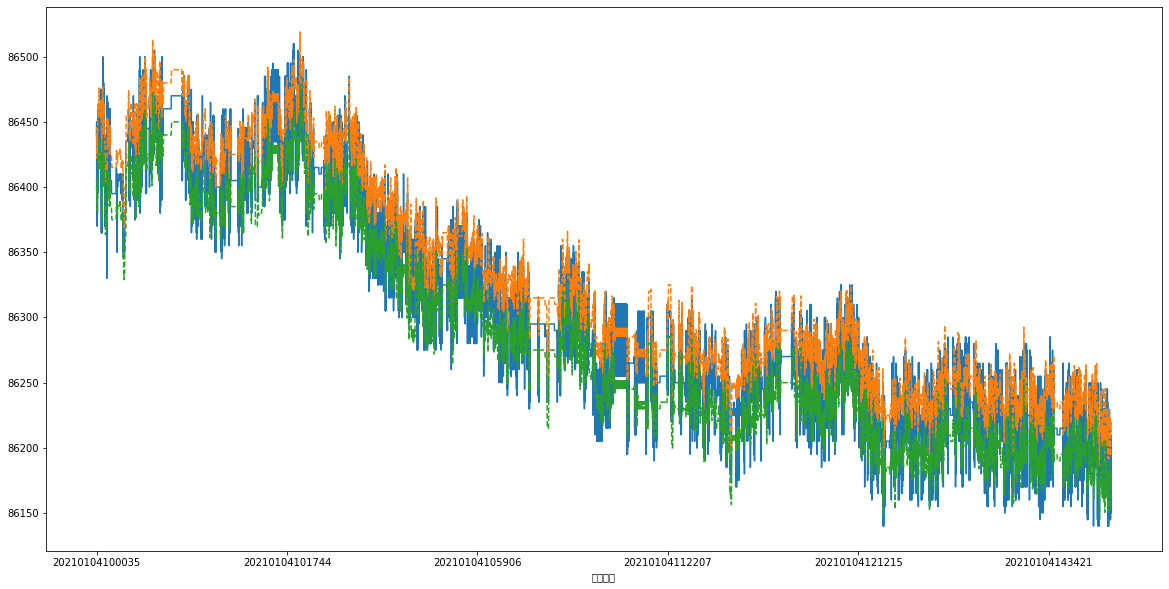

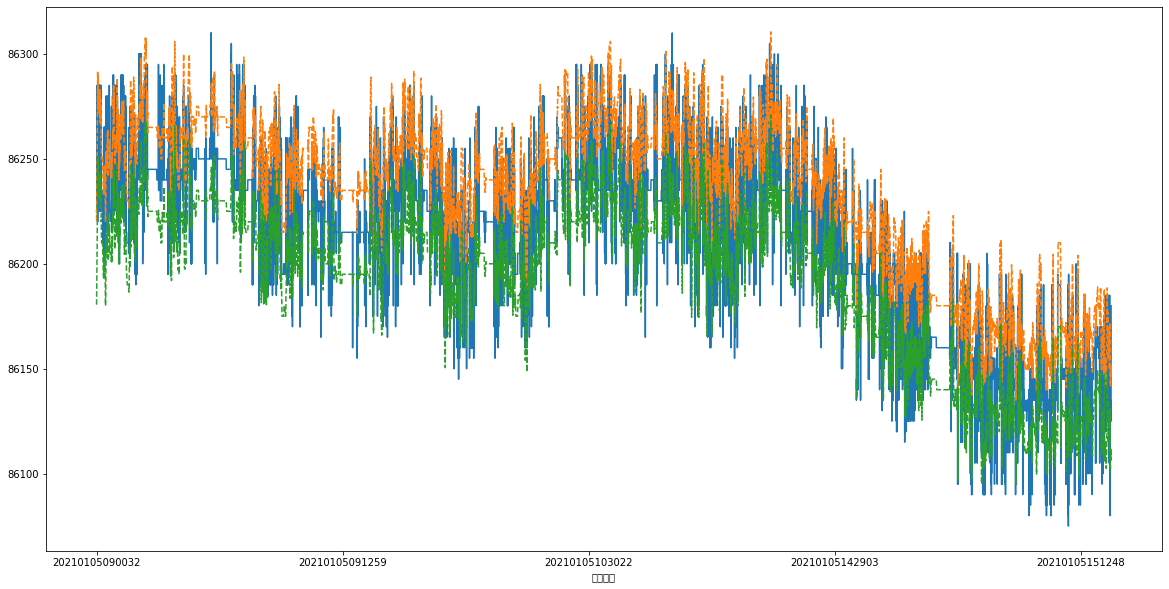

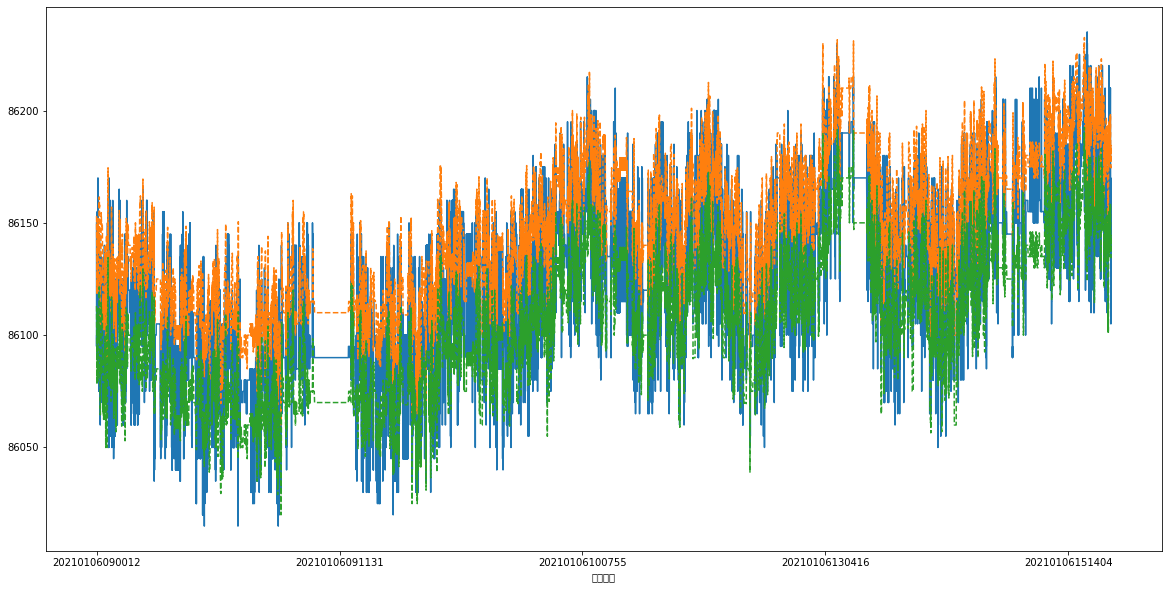

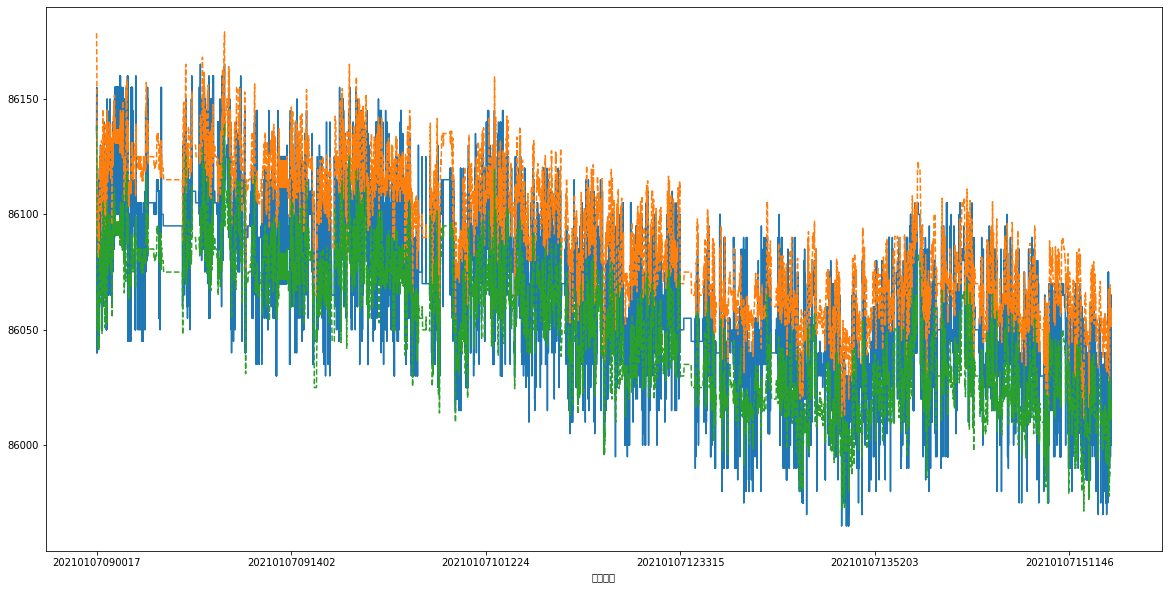

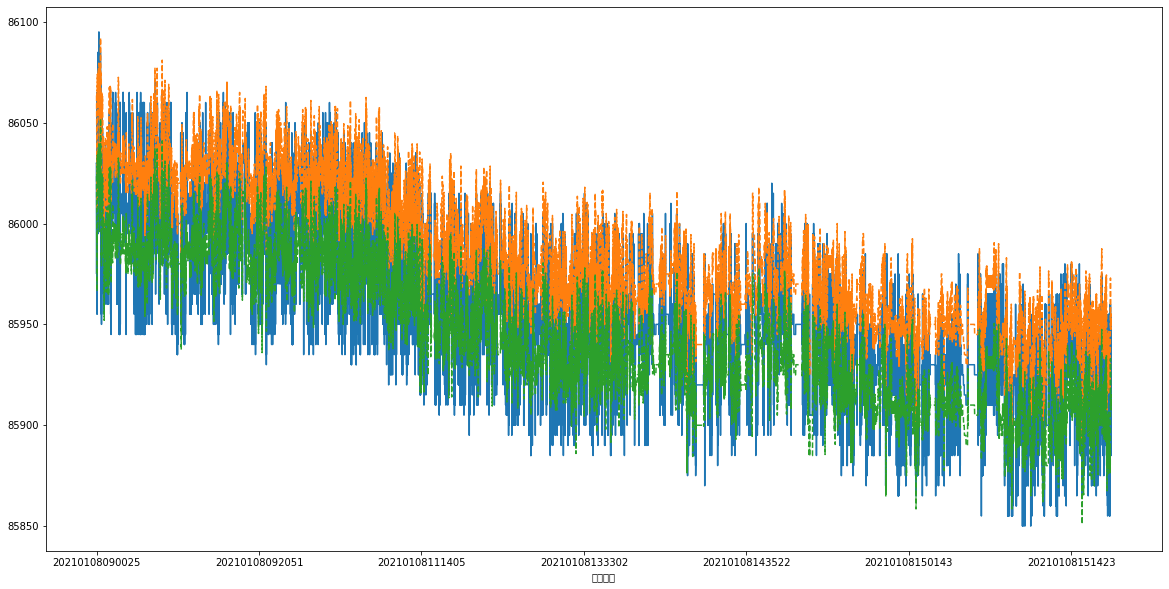

In [20]:
for date in calender[-10:]:
    plt.rcParams["figure.figsize"] = (20, 10)
    df[date]['spread'].plot()
    # df[date]['ma60_spread'].plot()
    temp_high = df[date]['ma60_spread'] +20
    temp_low = df[date]['ma60_spread']-20
    temp_high.plot(linestyle='--')
    temp_low.plot(linestyle='--')
    # df[date]['kodex200'].plot()
    # df[date]['kodex_inv'].plot()
    # plt.axhline((0.0003), color='red', linestyle='--')
    # plt.axhline((-0.0003), color='red', linestyle='--')
    plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_te

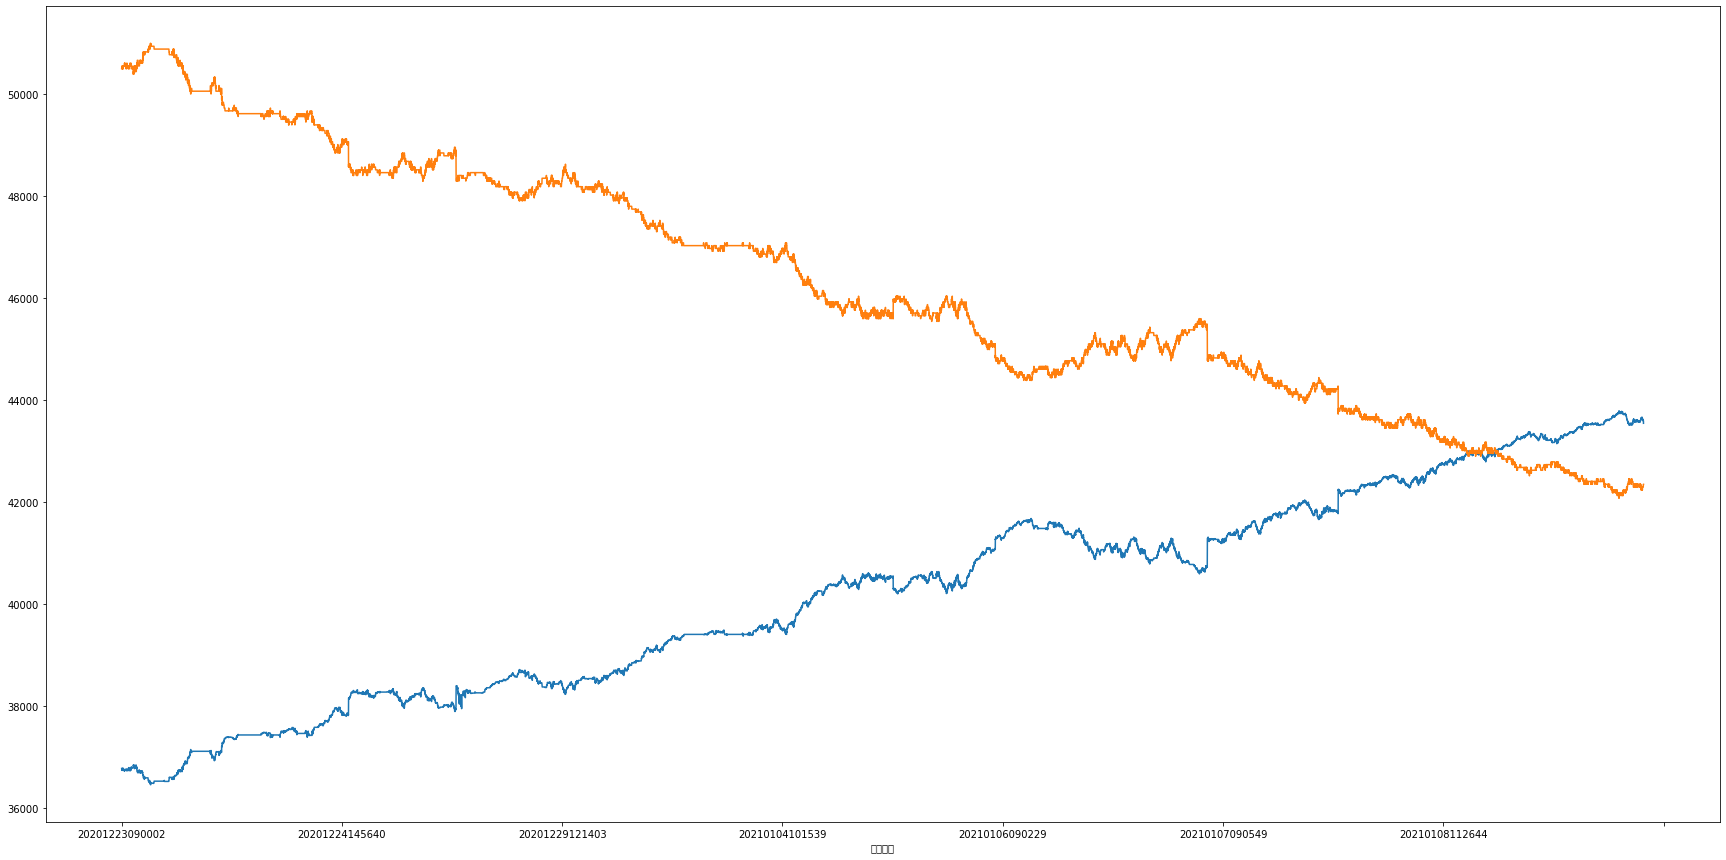

In [107]:
plt.rcParams["figure.figsize"] = (30, 15)
# temp['kodex200_cumret'].plot()
# temp['kodex_active_cumret'].plot()
# temp['kodex200_cumret'].plot()
temp['kodex200'].plot()
temp['kodex_inv'].plot()
# temp['ma30'].plot()